# HR Analytics: Job Change of Data Scientists

### Features:

* enrollee_id : Unique ID for enrollee
* city: City code
* citydevelopmentindex: Developement index of the city (scaled)
* gender: Gender of enrolee
* relevent_experience: Relevent experience of enrolee
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of enrolee
* major_discipline :Education major discipline of enrolee
* experience: Enrolee total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
test = pd.read_csv('aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


## Data preprocessing

### Missing values

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64


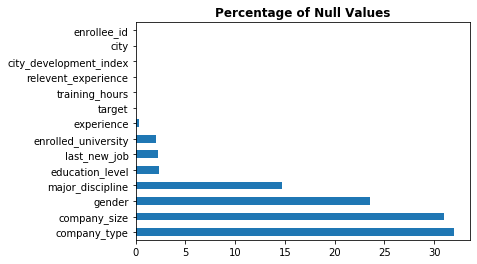

In [6]:
missing_values = (train.isnull().sum()/len(train))*100
print(missing_values)

missing_values.sort_values(ascending=False).plot(kind='barh')
plt.title('Percentage of Null Values',weight='bold')
plt.show()

### Null values imputation

**1. enrollee_id**

In [7]:
print('Number of Unique Values:',train['enrollee_id'].nunique())

Number of Unique Values: 19158


* enrollee_id - all are unique values, so drop it or set it as index

In [8]:
train.set_index('enrollee_id',inplace=True)
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
test.set_index('enrollee_id',inplace=True)
test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


**2. city**

In [10]:
print('Number of Unique Values:',train['city'].nunique())
print('Number of Null Values:',train['city'].isnull().sum())

print('Top 10 cities:') 
print((train['city'].value_counts()[0:10]))

Number of Unique Values: 123
Number of Null Values: 0
Top 10 cities:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
Name: city, dtype: int64


**3. city_development_index**

In [11]:
print("Number of Missing Values: ",train['city_development_index'].isnull().sum())

Number of Missing Values:  0


**4. gender**

In [12]:
print("Number of Missing Values: ", train['gender'].isnull().sum())

Number of Missing Values:  4508


In [13]:
train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

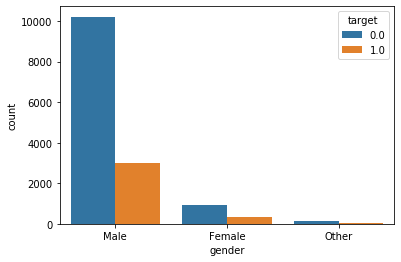

In [14]:
# Analysing Target on the Bases of Gender

sns.countplot(train['gender'],hue=train['target'])
plt.show()

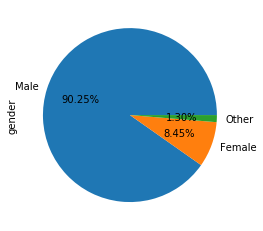

In [15]:
train['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

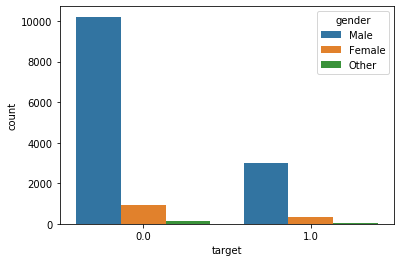

In [16]:
sns.countplot(train['target'],hue=train['gender'])
plt.show()

* From the above, we can say that the data is gender bias as there are more number of Male
* From the plot, we analyse that the percentage of males are more for Not Looking for Job Change


* So we can drop the feature

In [17]:
train.drop('gender',axis=1,inplace=True)
test.drop('gender',axis=1,inplace=True)

**5. relevent_experience**

In [18]:
print("Number of Missing Values:",train['relevent_experience'].isnull().sum())

Number of Missing Values: 0


In [19]:
train['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

**6. enrolled_university**

In [20]:
print("Number of Missing Values:",train['enrolled_university'].isnull().sum())

Number of Missing Values: 386


In [21]:
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

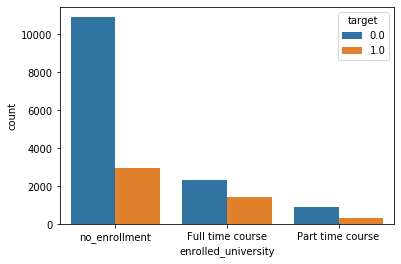

In [22]:
sns.countplot(train['enrolled_university'],hue=train['target'])
plt.show()

* Most of candidates has no enrollment are more likely not looking for a job change


* We can't assume that the missing data is left out or the candidates had no enrollment, but also we don't want to create a new value (like 'OTHER') because it can create a pattern that doesn't exist.


* So fill the missing values with the no_enrollment value

In [23]:
train["enrolled_university"] = train["enrolled_university"].fillna('no_enrollment')
test["enrolled_university"] = test["enrolled_university"].fillna('no_enrollment')

**7. education_level**

In [24]:
print("Number of Missing Values:",train['education_level'].isnull().sum())

Number of Missing Values: 460


In [25]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

* Most candidates are graduates


* Let us consider "education_level" as "Other" which are not mentioned (null values)

In [26]:
train["education_level"] = train["education_level"].fillna('Other')
test["education_level"] = test["education_level"].fillna('Other')

In [27]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Other               460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

**8. major_discipline**

In [28]:
print("Number of Missing Values:",train['major_discipline'].isnull().sum())

Number of Missing Values: 2813


In [29]:
train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

* Most of the candidates are STEM majors


* Let us consider "major_discipline" as "No Major" which are not mentioned (null values)

In [30]:
train['major_discipline'] = train['major_discipline'].fillna('No Major')
test['major_discipline'] = test['major_discipline'].fillna('No Major')

In [31]:
train['major_discipline'].value_counts()

STEM               14492
No Major            3036
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

**9. experience**

In [32]:
print("Number of Missing Values:",train['experience'].isnull().sum())

Number of Missing Values: 65


In [33]:
train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

* Let us consider "experience" as "0" which are not mentioned (null values)

In [34]:
train['experience'] = train['experience'].fillna(0)
test['experience'] = test['experience'].fillna(0)

In [35]:
train['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 0],
      dtype=object)

* The experience variable is an object indicating the minimum or maximum years of experience a candidate has, so deleting the operators won't make a big difference

In [36]:
# First convert the column to string

train['experience'] = train['experience'].astype(str)
test['experience'] = test['experience'].astype(str)

In [37]:
train['experience'] = train['experience'].apply(lambda x: x.replace('>20','21'))
train['experience'] = train['experience'].apply(lambda x: x.replace('<1','0'))
test['experience'] = test['experience'].apply(lambda x: x.replace('>20','21'))
test['experience'] = test['experience'].apply(lambda x: x.replace('<1','0'))

In [38]:
train['experience'] = train['experience'].astype(int)
test['experience'] = test['experience'].astype(int)

In [39]:
train['experience'].unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20])

**10. company_size**

In [40]:
print("Number of Missing Values:",train['company_size'].isnull().sum())

Number of Missing Values: 5938


In [41]:
train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [42]:
train['company_size'].isnull().sum()/len(train)*100

30.994884643490973

In [43]:
train[train['company_size'].isnull()]['experience'].value_counts()

21    917
3     599
4     563
2     548
5     483
6     349
0     314
7     311
1     281
9     237
10    208
8     202
11    154
15    130
14    112
16    103
12     98
13     79
17     77
19     68
18     64
20     41
Name: experience, dtype: int64

* Hence 31% of candidates didn't mention the company_size but they have experience, so we will assume that these candidates has not mentioned the company_size


* So fill null values as "not_mentioned"

In [44]:
train['company_size'] = train['company_size'].fillna('not_mentioned')
test['company_size'] = test['company_size'].fillna('not_mentioned')

In [45]:
train['company_size'].unique()

array(['not_mentioned', '50-99', '<10', '10000+', '5000-9999',
       '1000-4999', '10/49', '100-500', '500-999'], dtype=object)

In [46]:
train['company_size'] = train['company_size'].astype(str)
test['company_size'] = test['company_size'].astype(str)

train['company_size'] = train['company_size'].map(lambda x: x.replace('/','-'))
test['company_size'] = test['company_size'].map(lambda x: x.replace('/','-'))

In [47]:
train['company_size'].unique()

array(['not_mentioned', '50-99', '<10', '10000+', '5000-9999',
       '1000-4999', '10-49', '100-500', '500-999'], dtype=object)

**11. company_type**

In [48]:
print("Number of Missing Values:",train['company_type'].isnull().sum())

Number of Missing Values: 6140


In [49]:
train['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

* Most of candidates work in Private limited company type (pvt ltd)

In [50]:
train['company_type'].isnull().sum()/len(train)*100

32.04927445453596

In [51]:
train[train['company_type'].isnull()]['experience'].value_counts()

21    920
3     590
4     582
2     547
5     503
6     383
0     327
7     321
1     282
9     244
10    229
8     211
11    167
15    144
12    118
14    113
16    111
13     86
17     81
18     71
19     67
20     43
Name: experience, dtype: int64

* Hence 32% of candidates didn't mention the company_type but they have experience, so we will assume that these candidates has not mentioned the company_type


* So fill null values as "not_mentioned"

In [52]:
train['company_type'] = train['company_type'].fillna('not_mentioned')
test['company_type'] = test['company_type'].fillna('not_mentioned')

In [53]:
train['company_type'].unique()

array(['not_mentioned', 'Pvt Ltd', 'Funded Startup',
       'Early Stage Startup', 'Other', 'Public Sector', 'NGO'],
      dtype=object)

**12. last_new_job**

In [54]:
print("Number of Missing Values:", train['last_new_job'].isnull().sum())

Number of Missing Values: 423


In [55]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

* Let us consider the missing values are from candidates whose has no job

In [56]:
train['last_new_job'] = train['last_new_job'].fillna('never')
test['last_new_job'] = test['last_new_job'].fillna('never')

In [57]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

**13. training_hours**

In [58]:
print("Number of Missing Values:", train['training_hours'].isnull().sum())

Number of Missing Values: 0


**14. target**

In [59]:
print("Number of Missing Values: ",train['target'].isnull().sum())

Number of Missing Values:  0


#### Check for missing values after null values imputation

In [60]:
train.isnull().sum()

city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### city vs city_development_index

In [61]:
train[['city','city_development_index']].drop_duplicates().head()

,city,city_development_index
enrollee_id,,
8949,city_103,0.920
29725,city_40,0.776
11561,city_21,0.624
33241,city_115,0.789
666,city_162,0.767


* From the above, we can see that each city has specific city_development_index, so deleting this column won't make any difference to the model

In [62]:
train.drop('city',axis=1,inplace=True)
test.drop('city',axis=1,inplace=True)

## Data Visualization

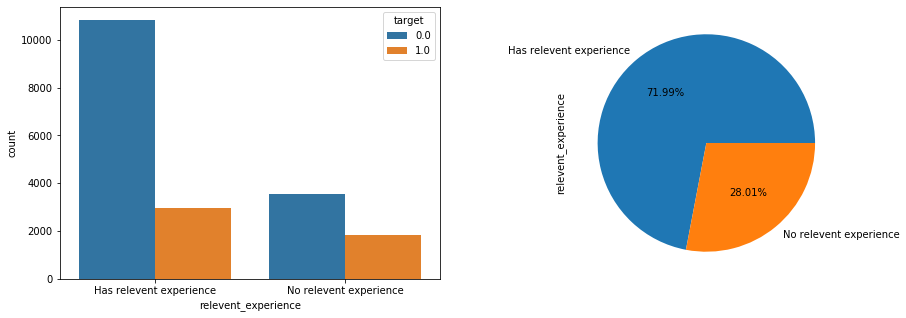

In [63]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(train['relevent_experience'],hue=train['target'],ax=axes[0])
train['relevent_experience'].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axes[1])
plt.show()

* Most of the candidates has relevant experience

* Candidates with relevant experience are not looking for a job change

* Candidates with no relevant experience are more keen to change job

* 72% employees has relevent experience and around 11k employees are not looking for job change

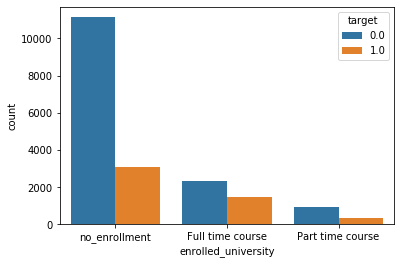

In [64]:
sns.countplot(train['enrolled_university'],hue=train['target'])
plt.show()

* Most of the candidates are having no enrollment in any university and those without any enrollment have no interest in changing their job

* Part Time course enrolled candidates are very less and they also don't want to change

* Full time enrolled are not very much looking for jobs but in proportion they have higher chance of changing the job than others

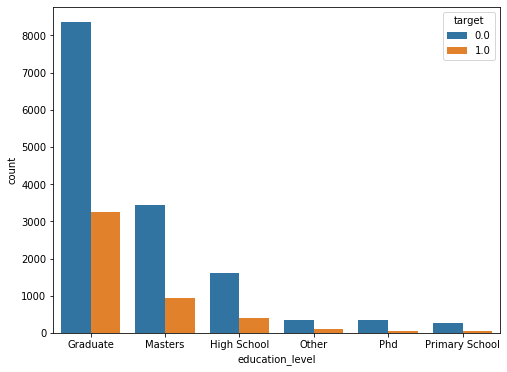

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(train['education_level'],hue=train['target'])
plt.show()

* Graduates have very less chance of leaving

* In every education level , there is a very less chance of changing job

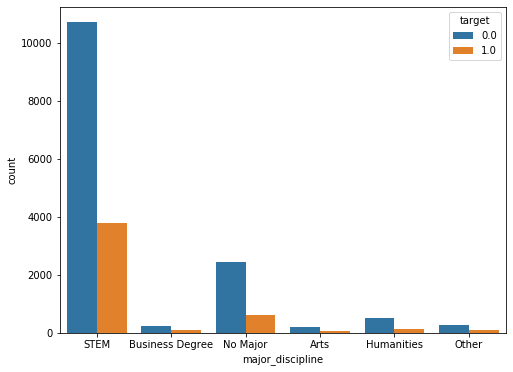

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(train['major_discipline'],hue=train['target'])
plt.show()

* Mostly candidates are STEM and not looking to change the job in any discipline

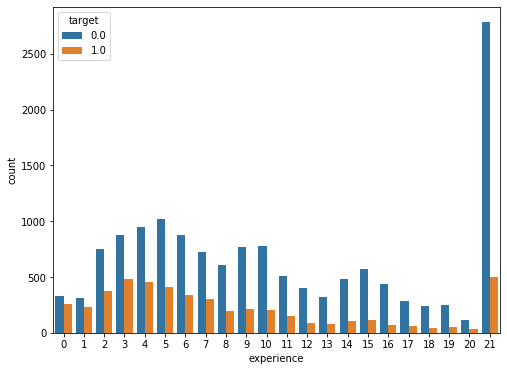

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(train['experience'],hue=train['target'])
plt.show()

* Candidates who have experience less than 1 year have more tendency to change their job while those with more than 20 years of experience have very less tendency of changing jobz

* As experience increases, tendency to change the job becomes less

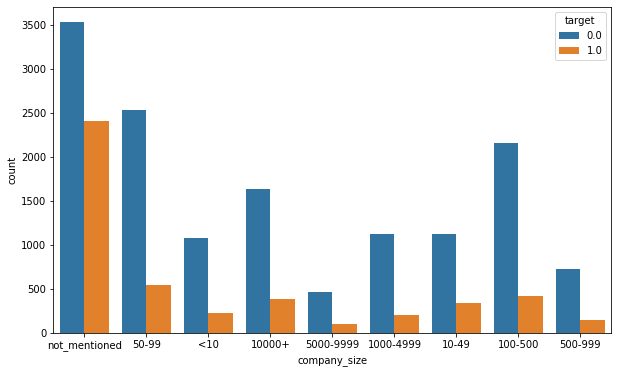

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(train['company_size'],hue=train['target'])
plt.show()

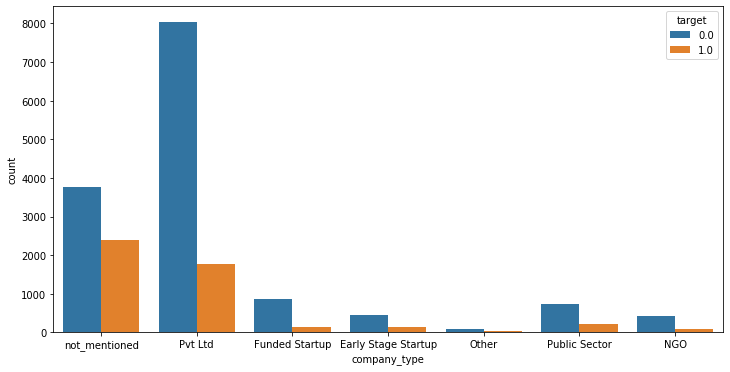

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(train['company_type'],hue=train['target'])
plt.show()

* All company type shows candidates do not leave the company after training

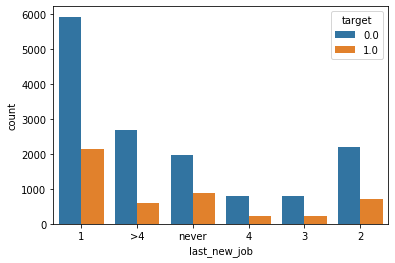

In [70]:
sns.countplot(train['last_new_job'],hue=train['target'])
plt.show()

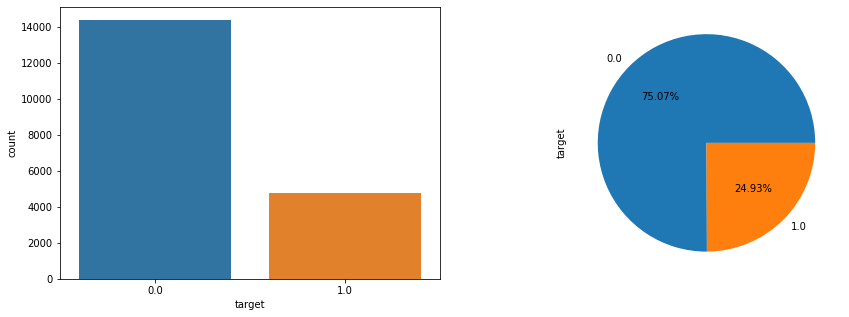

In [71]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(train['target'],ax=axes[0])
train['target'].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axes[1])
plt.show()

* So , probablity is higher that a person will not change job
* From the above two plots, we can see that data is imbalance and there are approx 75% of employees who are not looking for job change

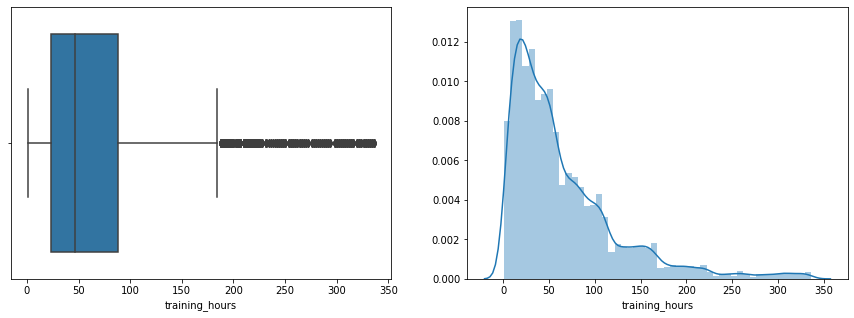

In [72]:
# Training Hour Distribution

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(train['training_hours'],ax=axes[0])
sns.distplot(train['training_hours'],ax=axes[1])
plt.show()

* Training Hour is right skewed and having outliers

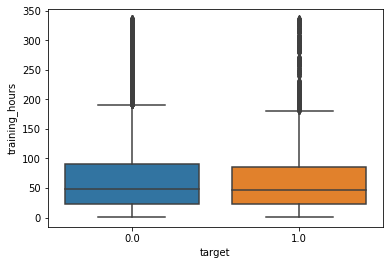

In [73]:
sns.boxplot(data=train,x='target',y='training_hours')
plt.show()

* From the plot, we can see that the number of hours used to train a candidate don't actually contribute a lot to the decision to change the fields for the candidate

* There is no much difference between training hours of those who are wishing to change and those who are not

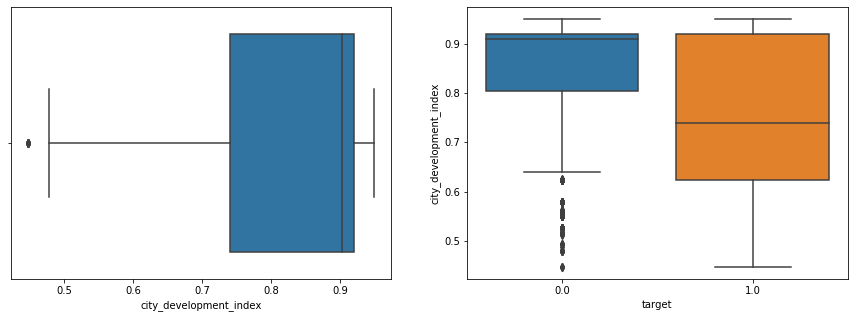

In [74]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(train['city_development_index'],ax=axes[0])
sns.boxplot(data=train,x='target',y='city_development_index',ax=axes[1])
plt.show()

* Most of the people who are not changing jobs are from city with high development index so basically they are having a comfortable life in respective city are not willing to change jobs

* People in cities with less development index looks to change their jobs maybe for better life style

### Encoding categorical data

In [75]:
train1 = pd.get_dummies(train)

In [76]:
train1.head()

,city_development_index,experience,training_hours,target,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,...,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_not_mentioned,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,0.920,21,36,1.0,1,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
29725,0.776,15,47,0.0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
11561,0.624,5,83,0.0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
33241,0.789,0,52,1.0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
666,0.767,21,8,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


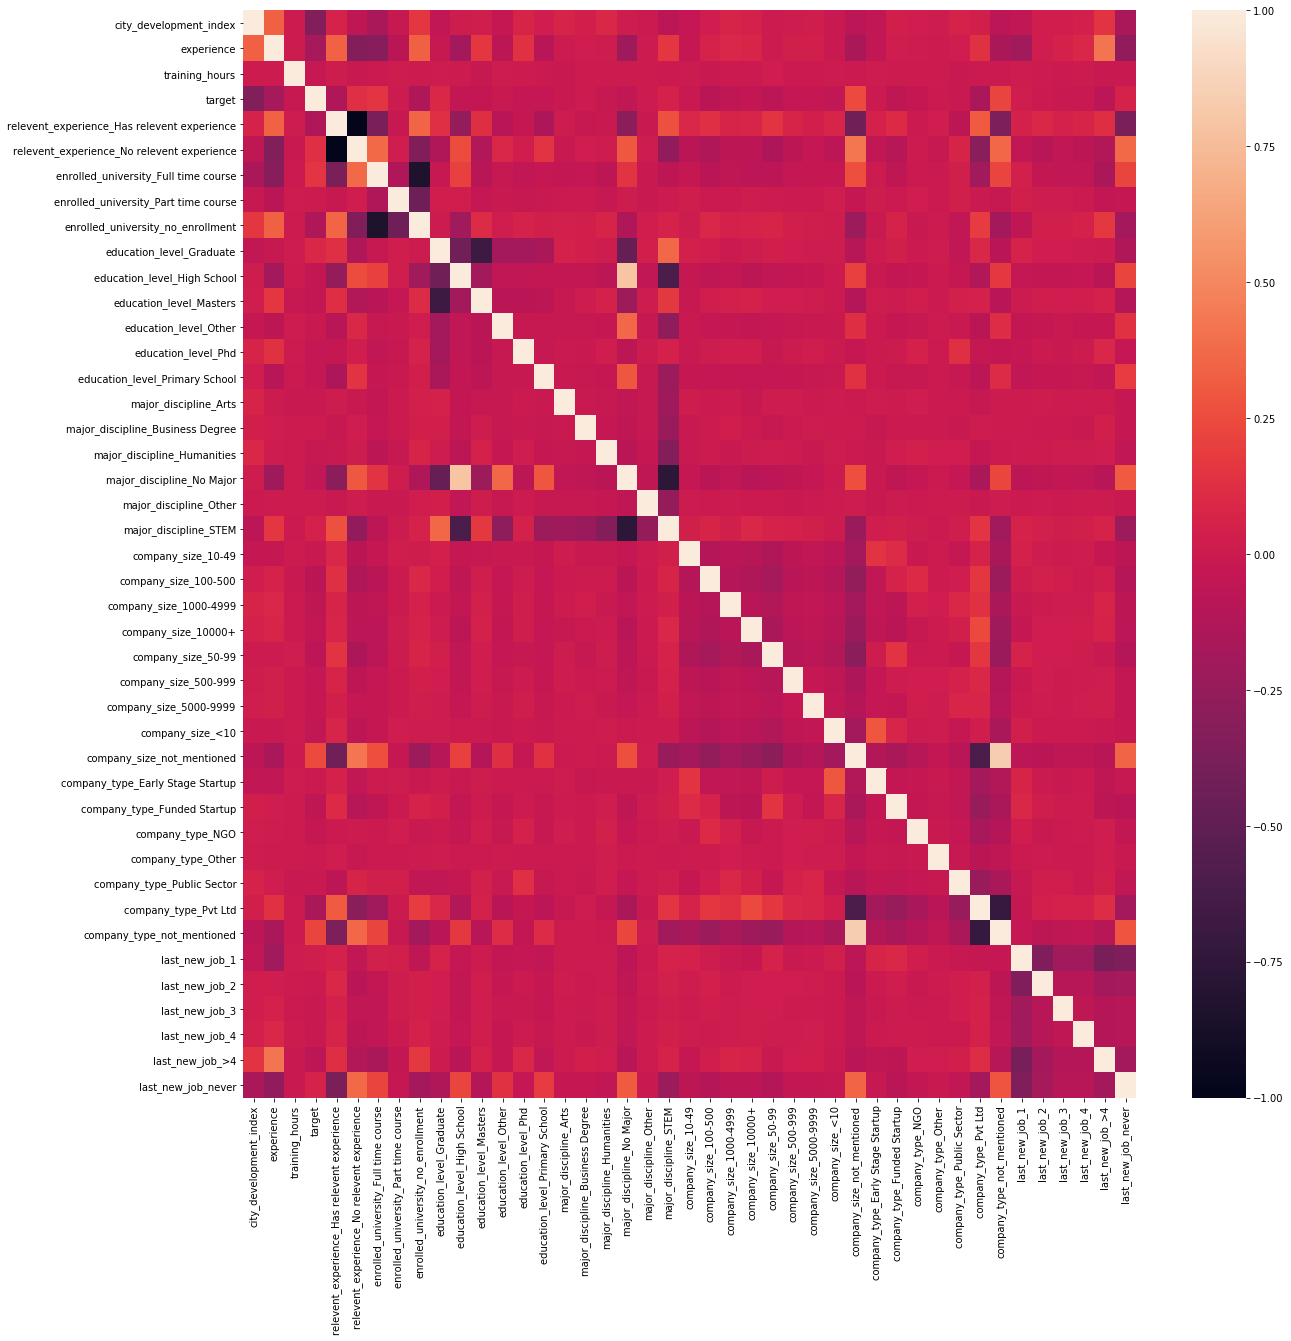

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(train1.corr())
plt.show()

In [78]:
x = train1.drop('target',1)
y = train1['target']

In [79]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [80]:
xtrain.shape

(13410, 42)

In [81]:
xtest.shape

(5748, 42)

In [82]:
ytrain.shape

(13410,)

In [83]:
ytest.shape

(5748,)

#### Using Anova test to check both train and test data represents the overall data


* Null hypothesis: Train and test data represents the overall data
* Alternate hypothesis: Train and test data doesn't represents the overall data

In [84]:
from scipy.stats import f_oneway

f_oneway(y,ytrain,ytest)

F_onewayResult(statistic=0.0010366797589089485, pvalue=0.9989638574360394)

* Since, P value > 0.05, we accept null hypothesis
* Hence, train and test data represents the overall data

### Fit ting a base model

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score

In [87]:
base_mod = LogisticRegression()
base_mod.fit(xtrain_sc,ytrain)

ytest_pred = base_mod.predict(xtest_sc)

In [88]:
print('Confusion Matrix:')
confusion_matrix(ytest,ytest_pred)

Confusion Matrix:


array([[4026,  290],
       [1046,  386]], dtype=int64)

In [89]:
print('Classification report:')
print(classification_report(ytest,ytest_pred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      4316
         1.0       0.57      0.27      0.37      1432

    accuracy                           0.77      5748
   macro avg       0.68      0.60      0.61      5748
weighted avg       0.74      0.77      0.74      5748



In [90]:
print('Overall accuracy:',accuracy_score(ytest,ytest_pred))

Overall accuracy: 0.767571329157968


* Accuracy is good to start with and can be improved further by tuning and refitting the model

In [91]:
print('Precision score:',precision_score(ytest,ytest_pred))
print('Recall score   :',recall_score(ytest,ytest_pred))
print('F1 score       :',f1_score(ytest,ytest_pred))

Precision score: 0.5710059171597633
Recall score   : 0.26955307262569833
F1 score       : 0.36622390891840606


In [92]:
print('Cohen’s Kappa Value:',cohen_kappa_score(ytest,ytest_pred))

Cohen’s Kappa Value: 0.24569892895590872


### Re-fitting the model

#### Comparing with other classification models:

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from xgboost import XGBClassifier

In [94]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [95]:
clf1 = LogisticRegression(max_iter=3000)
clf2 = RandomForestClassifier(random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = GaussianNB()
clf5 = XGBClassifier(random_state=0)

In [96]:
print('Accuracy scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc,ytrain,cv=kf,scoring='accuracy')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

Accuracy scores of the models
LR: 0.77 0.0
RF: 0.78 0.0
KNN: 0.76 0.0
GNB: 0.69 0.01
[15:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the

In [97]:
print('ROC AUC scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc,ytrain,cv=kf,scoring='roc_auc')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

ROC AUC scores of the models
LR: 0.78 0.01
RF: 0.77 0.01
KNN: 0.72 0.01
GNB: 0.71 0.01
[15:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

In [98]:
! pip install imblearn

### SMOTE - Treating imbalance data

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [100]:
y.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [101]:
len(y)

19158

In [102]:
count_class_0 = 10381
count_class_1 = 8777

pipe = make_pipeline(SMOTE(sampling_strategy={1:count_class_1}),NearMiss(sampling_strategy={0:count_class_0}))
inp, out = pipe.fit_resample(x,y)

In [103]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(inp,out,test_size=0.3,random_state=10)

In [104]:
sc = StandardScaler()
xtrain_sc1 = sc.fit_transform(xtrain1)
xtest_sc1 = sc.transform(xtest1)

In [105]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [106]:
clf1 = LogisticRegression(max_iter=3000)
clf2 = RandomForestClassifier(random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = GaussianNB()
clf5 = XGBClassifier(random_state=0)

In [107]:
print('Accuracy scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='accuracy')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

Accuracy scores of the models
LR: 0.78 0.01
RF: 0.8 0.0
KNN: 0.77 0.0
GNB: 0.7 0.0
[15:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

In [108]:
print('ROC AUC scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='roc_auc')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

ROC AUC scores of the models
LR: 0.87 0.0
RF: 0.87 0.01
KNN: 0.83 0.01
GNB: 0.75 0.01
[15:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore th

In [109]:
import statsmodels.api as sm

In [110]:
while(len(inp.columns)>0):
    inp_c=sm.add_constant(xtrain_sc1)
    ols=sm.Logit(ytrain1,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inp=inp.drop(f,axis=1)
    else:
        break
print('The final features : ',inp.columns)


         Current function value: inf
         Iterations: 35
The final features :  Index(['city_development_index', 'experience', 'training_hours',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_Other', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_size_10-49', 'company_size_100-500',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
       'company_size_not

In [111]:
print('Accuracy scores of the models')
for i,j in zip([clf1,clf2,clf3,clf4,clf5],['LR','RF','KNN','GNB','XG']):
    score = cross_val_score(i,xtrain_sc1,ytrain1,cv=kf,scoring='accuracy')
    print(j+':',round(np.mean(score),2),round(np.std(score),2))

Accuracy scores of the models
LR: 0.78 0.01
RF: 0.8 0.0
KNN: 0.77 0.0
GNB: 0.7 0.0
[15:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

In [112]:
rf=RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_split=2,n_estimators=100)
rf.fit(xtrain,ytrain)
rf.feature_importances_

array([0.25291233, 0.14110402, 0.20029867, 0.01268356, 0.0122746 ,
       0.01350624, 0.00777928, 0.01422171, 0.01992817, 0.0060365 ,
       0.01261488, 0.00431942, 0.00356918, 0.00349466, 0.00351037,
       0.00404448, 0.00563433, 0.01036589, 0.00428757, 0.01246948,
       0.00823784, 0.01099471, 0.0076185 , 0.00879149, 0.01191612,
       0.00653608, 0.00486081, 0.00776281, 0.0371314 , 0.00448194,
       0.00649136, 0.00499322, 0.00245894, 0.00697614, 0.01964441,
       0.0291375 , 0.01931403, 0.014523  , 0.00911048, 0.00834977,
       0.0117264 , 0.01388773])

In [113]:
rf_features=pd.DataFrame({'Features':xtrain.columns,'Feature_importance':rf.feature_importances_})
rf_features.sort_values('Feature_importance',ascending=False)

,Features,Feature_importance
0,city_development_index,0.252912
2,training_hours,0.200299
1,experience,0.141104
28,company_size_not_mentioned,0.037131
35,company_type_not_mentioned,0.029137
8,education_level_Graduate,0.019928
34,company_type_Pvt Ltd,0.019644
36,last_new_job_1,0.019314
37,last_new_job_2,0.014523
7,enrolled_university_no_enrollment,0.014222


In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [117]:
features=pd.DataFrame()
features['values']=dt.feature_importances_
features['features']=xtrain.columns
features.sort_values('values',ascending=True)

,values,features
12,0.001661,education_level_Phd
11,0.001799,education_level_Other
13,0.002025,education_level_Primary School
32,0.002188,company_type_Other
14,0.003005,major_discipline_Arts
9,0.003119,education_level_High School
18,0.003192,major_discipline_Other
17,0.003318,major_discipline_No Major
31,0.003425,company_type_NGO
22,0.003943,company_size_1000-4999


In [ ]:
#education_level_Phd,education_level_Other,education_level_Primary School,company_type_Other,major_discipline_Arts,education_level_High School,company_type_Other,major_discipline_Arts,education_level_High School,major_discipline_Other,major_discipline_No Major,company_type_NGO,company_size_1000-4999,company_type_Funded Startup,company_size_5000-9999,company_size_5000-9999,major_discipline_Business Degree,last_new_job_never,education_level_Masters,education_level_Graduate,last_new_job_1,last_new_job_2,company_size_not_mentioned,company_size_500-999,company_type_Early Stage Startup,training_hours,

In [10]:
train.sort_values(by='city_development_index',ascending=True,axis=0)['target']

13549    0.0
5265     1.0
10401    0.0
14913    0.0
16784    1.0
        ... 
6432     0.0
18753    0.0
1680     0.0
17479    0.0
12844    0.0
Name: target, Length: 19158, dtype: float64

In [11]:
train['city_development_index'].value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [13]:
train.groupby('city_development_index','target')

ValueError: No axis named target for object type <class 'pandas.core.frame.DataFrame'>

In [28]:
train.groupby(['city_development_index','target']).max()

enrollee_id  training_hours
city_development_index target                             
0.448                  0.0           31179              74
                       1.0           31194             154
0.479                  0.0           32218             222
                       1.0           33297             316
0.487                  0.0           33174              92
...                                    ...             ...
0.926                  1.0           33258             324
0.939                  0.0           33341             332
                       1.0           32578             334
0.949                  0.0           32967             306
                       1.0           27963             268

[180 rows x 2 columns]

In [19]:
train['city_development_index'].max()

0.949

In [29]:
train.groupby(['city_development_index','target']).min()

enrollee_id  training_hours
city_development_index target                             
0.448                  0.0            3891              14
                       1.0             598              15
0.479                  0.0            1973               4
                       1.0           11343              11
0.487                  0.0           33174              92
...                                    ...             ...
0.926                  1.0              10               3
0.939                  0.0             248               2
                       1.0            1636               3
0.949                  0.0             169               3
                       1.0             898               3

[180 rows x 2 columns]

In [36]:
pd.crosstab(train['city_development_index','target']).plot(kind='bar')
plt.show()

KeyError: ('city_development_index', 'target')

In [78]:
pd.crosstab(train['city_development_index'],train['target'])[1].sort_values(ascending=False).head(1)

city_development_index
0.624    1597
Name: 1.0, dtype: int64

In [81]:
pd.crosstab(train['city_development_index'],train['target'])[1].sort_values(ascending=True).head(5)

city_development_index
0.645    0
0.693    0
0.898    0
0.788    0
0.625    0
Name: 1.0, dtype: int64